In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
img_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

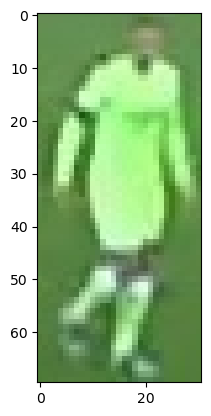

In [5]:
plt.imshow(image)
plt.show()

# Take top half of image

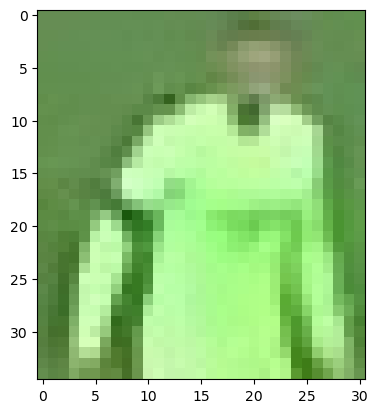

In [6]:
top_half = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half)

# Cluster image into 2 cluster, shirt and background

c:\Users\luanh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


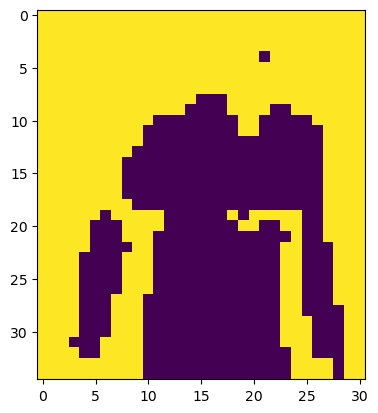

In [8]:
#Reshape image into 2d array

image_2d = top_half.reshape(-1,3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape labels to original image

clustered_image = labels.reshape(top_half.shape[0],top_half.shape[1])

# Display results
plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]

non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [ ]:
kmeans.cluster_centers_[player_cluster]
#returns an array of rgb values, which gets the shirt color

array([176.56984479, 244.50332594, 150.61862528])